# Citation Network Analysis
<br><br>
In this notebook we are going to explore the citation analysis in “Climate Change Mitigation” using Scopus API in
the last five years.<br> This notebook is part of Social Network analysis course project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use('ggplot')

1. 
Construct a small database containing the list of papers outputted by the API as output
the query “climate change mitigation” with title, author names and country of the
affiliation and a list of keywords, if available. 

In [2]:
# Read data to pandas dataframe
data = pd.read_csv('scopus.csv')

# Print first 5 rows of raw data
data.head()


,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Monerie P.-A., Pohl B., Gaetani M.",36995939400;8934032500;15319055900;,The fast response of Sahel precipitation to cl...,2021,npj Climate and Atmospheric Science,4,1,24,NaN,NaN,...,NaN,NaN,NaN,English,npj Clim. Atmos. Sci.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85103988374
1,"Koh L.P., Zeng Y., Sarira T.V., Siman K.",7004786474;55344338300;57217291359;57222126865;,Carbon prospecting in tropical forests for cli...,2021,Nature Communications,12,1,1271,NaN,NaN,...,NaN,NaN,33627656.0,English,Nat. Commun.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85101550210
2,"Zvobgo L., Tsoka J.",57219534369;57201192530;,Deforestation rate and causes in Upper Manyame...,2021,"Trees, Forests and People",5,NaN,100090,NaN,NaN,...,NaN,NaN,NaN,English,Tree. For. People.,Article,Final,NaN,Scopus,2-s2.0-85104576122
3,"West T.A.P., Salekin S., Melia N., Wakelin S.J...",55970453700;56664449200;56862288100;7005793487...,Diversification of forestry portfolios for cli...,2021,Journal of Environmental Management,289,NaN,112482,NaN,NaN,...,NaN,JEVMA,33813299.0,English,J. Environ. Manage.,Article,Final,NaN,Scopus,2-s2.0-85103643397
4,Basupi I.,55602343700;,Implications of Climate Change Mitigation and ...,2021,Journal of Infrastructure Systems,27,2,04021009,NaN,NaN,...,NaN,NaN,NaN,English,J. Infrastruct. Syst.,Article,Final,NaN,Scopus,2-s2.0-85103308527


In [3]:
# Select columns that we want to use
data = data.iloc[:, [0, 1, 2, 14, 15, 17]]


In [4]:
#make strings lowercase to help in comparing
data["Author Keywords"] = data["Author Keywords"].str.lower()
data["Authors"] = data["Authors"].str.lower()

In [5]:
data.tail()

,Authors,Author(s) ID,Title,Affiliations,Authors with affiliations,Author Keywords
750,"dedinec a., taseska-gjorgievska v., markovska ...",55447959200;26430113800;22994164800;5709264690...,Towards post-2020 climate change regime: Analy...,Research Center for Energy and Sustainable Dev...,"Dedinec, A., Research Center for Energy and Su...",climate change mitigation; eu targets; markal ...
751,creutzig f.,23995215600;,Economic and ecological views on climate chang...,Mercator Research Institute on Global Commons ...,"Creutzig, F., Mercator Research Institute on G...",beccs; bioenergy; biophysical limits; climate ...
752,ekholm t.,23569259100;,Optimal forest rotation age under efficient cl...,"VTT Technical Research Centre of Finland, VTT,...","Ekholm, T., VTT Technical Research Centre of F...",carbon pricing; climate change mitigation; opt...
753,"kaspersen b.s., jacobsen t.v., butts m.b., boe...",56901402800;18433965900;7004354427;55887715600...,Integrating climate change mitigation into riv...,"Department of Environmental, Social and Spatia...","Kaspersen, B.S., Department of Environmental, ...",agriculture; climate change mitigation; decisi...
754,"lindstad h., bright r.m., strømman a.h.",57204851094;34976345200;8699301400;,Economic savings linked to future Arctic shipp...,Norwegian Marine Technology Research Institute...,"Lindstad, H., Norwegian Marine Technology Rese...",arctic; emissions; greenhouse gases; gwp; imo;...


In [6]:
data.info()
# Save new dataframe to csv file
data.to_csv('parsed_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Authors                    755 non-null    object
 1   Author(s) ID               755 non-null    object
 2   Title                      755 non-null    object
 3   Affiliations               750 non-null    object
 4   Authors with affiliations  754 non-null    object
 5   Author Keywords            640 non-null    object
dtypes: object(6)
memory usage: 35.5+ KB


<br>Next we would like to analyze how authors compare to each other in terms of number of publications and what kind of keywords are used in these papers. However we notice that certian columns contain multiple wanted elements in each row. These values are Authors, Author(s) ids and Author keywords. Next we need to compose some kind of lists from the information given in data file. Let's start by exploding these columns into lists where don't care about relations between these objects and clean up the data<br>

In [7]:
data['Author(s) ID'] = data['Author(s) ID'].str.split(';')
data['Authors'] = data['Authors'].str.split(', ')
data['Author Keywords'] = data['Author Keywords'].str.split('; ')

In [8]:
#When iterating to list, we need to remember remove empty value from cell
data['Author(s) ID'].head()

0             [36995939400, 8934032500, 15319055900, ]
1    [7004786474, 55344338300, 57217291359, 5722212...
2                         [57219534369, 57201192530, ]
3    [55970453700, 56664449200, 56862288100, 700579...
4                                      [55602343700, ]
Name: Author(s) ID, dtype: object

In [9]:
res_ids = data.explode('Author(s) ID').reset_index(drop=True)
res_authors = data.explode('Authors').reset_index(drop=True)
res_keywords = data.explode('Author Keywords')

author_ids = res_ids['Author(s) ID'].values.tolist()
authors = res_authors['Authors'].values.tolist()
keywords = res_keywords["Author Keywords"].values.tolist()

In [10]:
# remove empty strings mentioned above
author_ids = list(filter(None, author_ids))
authors = list(filter(None, authors))
keywords = [x for x in keywords if str(x) != 'nan']

In [11]:
#check match
#print(Counter(author_ids))
print(len(author_ids))
print(len(authors))

#We can see from discrepancy of values below there is misspelling of author names
#Logical way to bypass the problem is to use Author IDs in comparison and get the names with API call

3217
3220


In [12]:
#Needs working VPN connection to university servers (who has subscription) to get authorized access token.
from pybliometrics.scopus import AuthorRetrieval

#name = AuthorRetrieval(55447959200)
#print(name.affiliation_current[0][8]) get country of author

In [13]:
#We need to create dictionary, we can cross-check authors id to a name

#WARNING! This will throw error if VPN is not connected
#
#Takes too long, instead get names when you know exact ids
#
#for id in author_ids:
#    s = AuthorRetrieval(id)
#    author_names.append(s.indexed_name)

#    counter += 1     #progress bar
#    clear_output(wait=True)
#    print("{}/3206".format(counter))
#

<br>Now we can count how many times one author is mentioned in publication and plot results to histogram. **Note** that only first 300 authors are included in plot. Rest of the authors had their name mentioned once in this dataset<br>

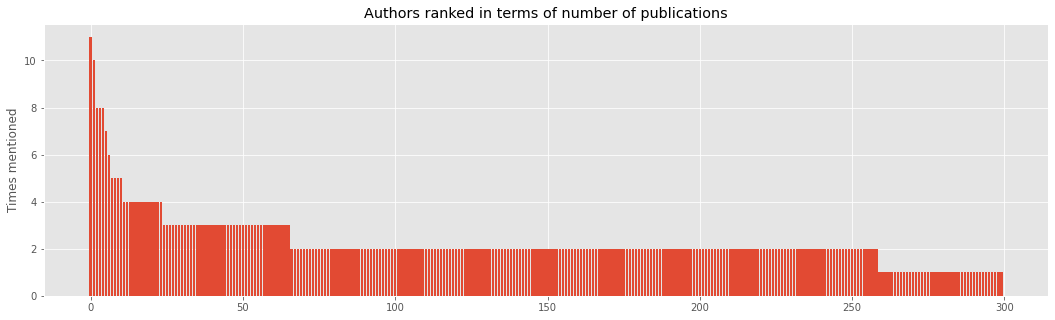

In [14]:
auth_counter = Counter(author_ids)
frequent_names, frequent_counts = zip(*auth_counter.most_common(300))
    
y_pos = np.arange(len(frequent_names))

fig, ax = plt.subplots(figsize=(18,5))
plt.bar(y_pos, frequent_counts, align='center')
plt.ylabel('Times mentioned')
plt.title('Authors ranked in terms of number of publications')
plt.show()

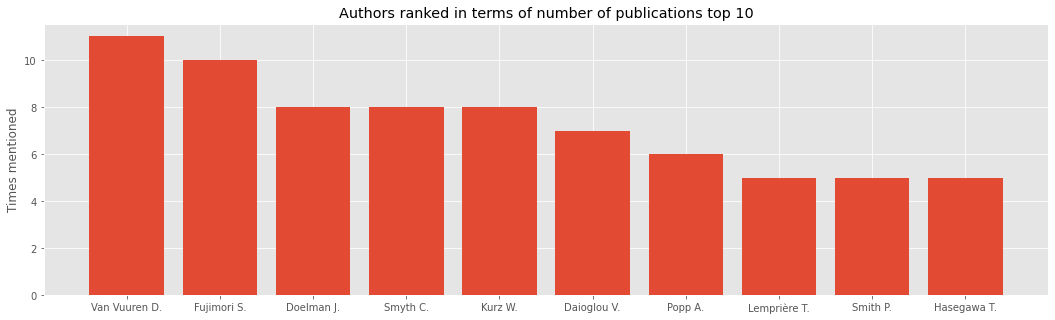

In [15]:
auth_counter = Counter(author_ids)
frequent_names, frequent_counts = zip(*auth_counter.most_common(10))
author_names = []

for index in range(10):
    s = AuthorRetrieval(frequent_names[index])
    author_names.append(s.indexed_name)
    
y_pos = np.arange(len(frequent_names))

fig, ax = plt.subplots(figsize=(18,5))
plt.bar(y_pos, frequent_counts, align='center')
plt.xticks(y_pos, author_names)
plt.ylabel('Times mentioned')
plt.title('Authors ranked in terms of number of publications top 10')
plt.show()

distinct collaberators


In [16]:
#remove whitespaces from data
cleaned_data = []

for author in data["Author(s) ID"]:
    temp_list = []
    
    for value in author:
        
        if value and value.strip():
            temp_list.append(value)
    cleaned_data.append(temp_list)
    

In [17]:
import itertools
collaberators = []

for authors in cleaned_data:
    for combination in itertools.combinations(authors, 2):
        collaberators.append((combination[0],combination[1]))  

In [18]:
import collections
combination_list = []

for authors in cleaned_data:
    for combination in itertools.combinations(authors, 2):
        combination_list.append(combination)
        

In [19]:
fixed_list = list(set([i for i in combination_list]))

erdo_authors = []
for elem in fixed_list:
    erdo_authors.append(elem[0])
    erdo_authors.append(elem[1])

In [20]:
connection_counter = Counter(erdo_authors)
frequent_author, frequent_connection = zip(*connection_counter.most_common(300))


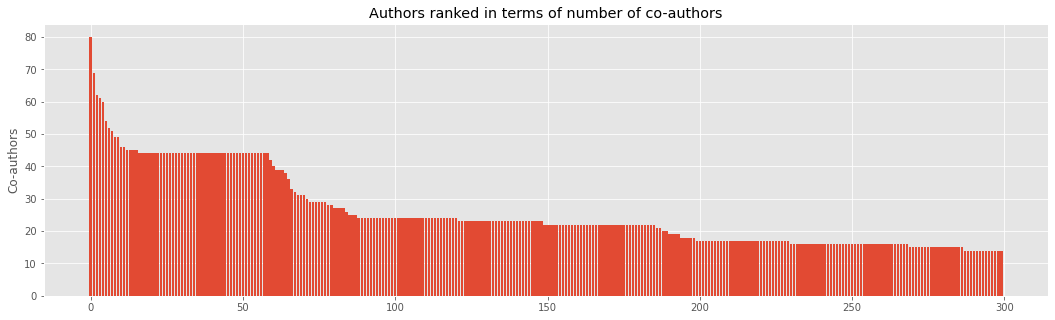

In [21]:
#for index in range(10):
    #s = AuthorRetrieval(frequent_author[index])
    #plot_list.append(s.indexed_name)
    
fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(frequent_author)), frequent_connection, align='center')
#plt.xticks(np.arange(len(plot_list)), plot_list)
plt.ylabel('Co-authors')
plt.title('Authors ranked in terms of number of co-authors')
plt.show()

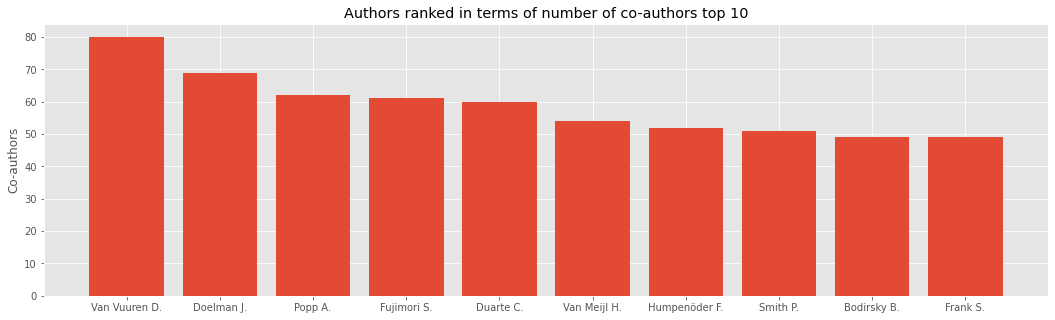

In [22]:
connection_counter = Counter(erdo_authors)
frequent_author, frequent_connection = zip(*connection_counter.most_common(10))

plot_list = []
for index in range(10):
    s = AuthorRetrieval(frequent_author[index])
    plot_list.append(s.indexed_name)
    
fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(frequent_author)), frequent_connection, align='center')
plt.xticks(np.arange(len(plot_list)), plot_list)
plt.ylabel('Co-authors')
plt.title('Authors ranked in terms of number of co-authors top 10')
plt.show()

<br>Let's also print the keyword occurences and check which keywords were the most popular ones.<br>

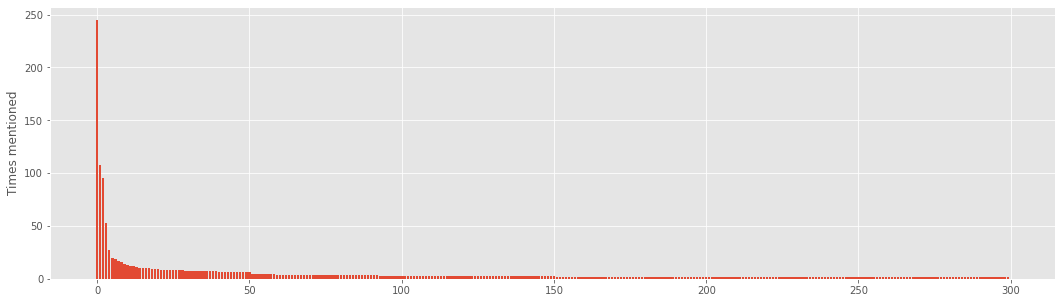

In [23]:
keyword_counter = Counter(keywords)
frequent_keywords, frequent_wordcounts = zip(*keyword_counter.most_common(300))

fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(frequent_keywords)), frequent_wordcounts, align='center')
plt.ylabel('Times mentioned')
plt.show()

In [24]:
print("Most popular keywors:\n")
for i in range(30):
    print("{}. {} {}".format(i+1, frequent_keywords[i], frequent_wordcounts[i]))

Most popular keywors:

1. climate change 245
2. climate change mitigation 108
3. mitigation 95
4. adaptation 53
5. agriculture 27
6. carbon sequestration 20
7. climate policy 19
8. renewable energy 17
9. sustainability 16
10. greenhouse gas emissions 14
11. bioenergy 13
12. paris agreement 12
13. redd+ 12
14. food security 11
15. biomass 10
16. sustainable development 10
17. emissions 10
18. greenhouse gas 10
19. co2 emissions 9
20. energy efficiency 9
21. governance 9
22. climate change adaptation 8
23. carbon footprint 8
24. life cycle assessment 8
25. climate mitigation 8
26. resilience 8
27. vulnerability 8
28. carbon 8
29. co-benefits 8
30. carbon stock 7


### Construct graph

5. Provide in a table the global attributes of this graph in terms of number of nodes,
edges, largest component, average degree centrality, global clustering coefficient,
diameter, average path length.

In [25]:
import networkx as nx

In [26]:
#remove whitespaces from data
cleaned_data = []

for author in data["Author(s) ID"]:
    temp_list = []
    
    for value in author:
        
        if value and value.strip():
            temp_list.append(value)
    cleaned_data.append(temp_list)
   

In [27]:
import itertools

G = nx.Graph()
for authors in cleaned_data:
    for combination in itertools.combinations(authors, 2):
        G.add_edge(combination[0],combination[1])  


        
print(nx.info(G))  

Name: 
Type: Graph
Number of nodes: 2765
Number of edges: 9454
Average degree:   6.8383


In [28]:
print("Total number of nodes: " + str(len(G.nodes)))
print("Total number of edges: " + str(len(G.edges)))



Total number of nodes: 2765
Total number of edges: 9454


In [29]:
print("Is graph connected: "+ str(nx.is_connected(G)))
print("Number of connected components: " + str(nx.number_connected_components(G)))

large_comp = 0
components = nx.connected_components(G)
for component in components:
    if len(component) > large_comp:
        large_comp = len(component)
        
print("Largest connected component: " + str(large_comp))

Is graph connected: False
Number of connected components: 501
Largest connected component: 343


In [30]:
import statistics
print("-------")
print("Global clustering coefficient: " + str(round(nx.average_clustering(G), 4))) # average clustering coefficient

print("Graph diameter: infinite, bacause graph is not connected")
#print("Average path length: " + str(round(nx.average_shortest_path_length(G), 4))) #average path length


#Average degree centrality
res = 0
dict_degree_centrality = nx.degree_centrality(G)

for value in dict_degree_centrality.values():
    res += value
    
avg_degree_cent = res / len(dict_degree_centrality)

print("Average degree centrality: " + str(round(avg_degree_cent, 4)))

-------
Global clustering coefficient: 0.8899
Graph diameter: infinite, bacause graph is not connected
Average degree centrality: 0.0025


Table of global atributes 

| Atribute | | Value |
| :-- | --- | :-: |
| Number of nodes |  | 2765 |
| Number of edges |  | 9454 |
| Largest component |  | 343 |
| Average degree centrality |  | 0.0025 |
| Global clustering coefficient |  | 0.8899 |
| Graph diameter |  | inf(not connected) |
| Average path length |  | inf(not connected) |

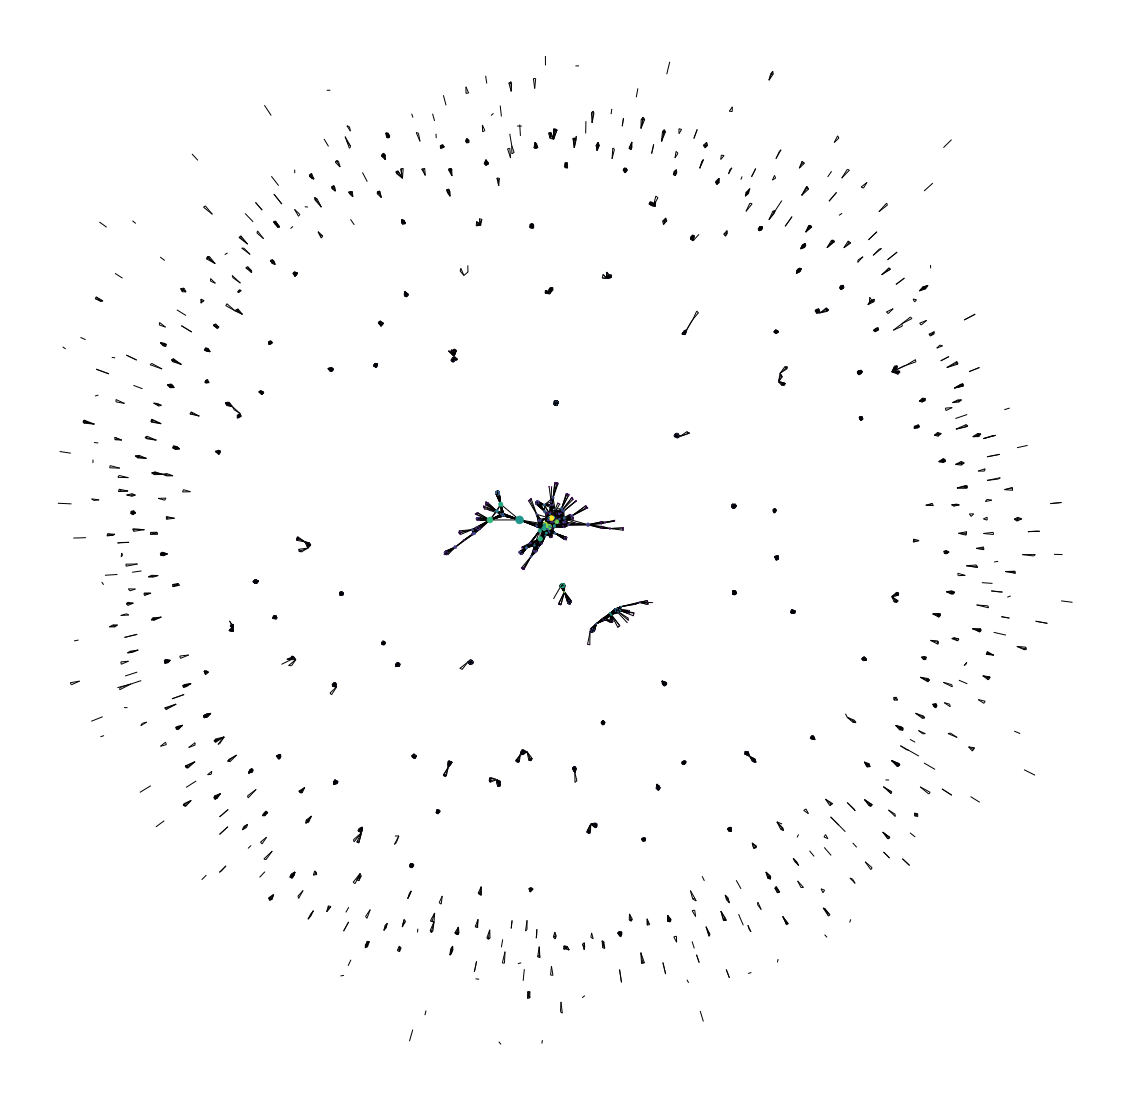

In [32]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [2000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size)
plt.axis('off')
plt.savefig("graph_connections.pdf")

plt.show()


6. Using the concept of Erdo-number, identify the author who has got the largest number
of collaborators (co-authored the papers) and assume this author will be assigned
Erdos number 0 and direct co-authors will be assigned Erdos number 1, while other
authors who co-authors with the first collaborators and not with that of Erdos number
0, will be assigned Erdos number 2, etc.. Draw the distribution of this new Erdos
number in terms of number authors that fall in each Erdos number category.


In [33]:
import collections
combination_list = []

for authors in cleaned_data:
    for combination in itertools.combinations(authors, 2):
        combination_list.append(combination)
        


In [34]:
Counter(combination_list) #samoja yhteyksiä on monella kirjoittajalla

Counter({('36995939400', '8934032500'): 1,
         ('36995939400', '15319055900'): 1,
         ('8934032500', '15319055900'): 1,
         ('7004786474', '55344338300'): 1,
         ('7004786474', '57217291359'): 1,
         ('7004786474', '57222126865'): 1,
         ('55344338300', '57217291359'): 1,
         ('55344338300', '57222126865'): 1,
         ('57217291359', '57222126865'): 1,
         ('57219534369', '57201192530'): 1,
         ('55970453700', '56664449200'): 1,
         ('55970453700', '56862288100'): 1,
         ('55970453700', '7005793487'): 1,
         ('55970453700', '37058097500'): 1,
         ('55970453700', '7801384122'): 1,
         ('56664449200', '56862288100'): 1,
         ('56664449200', '7005793487'): 1,
         ('56664449200', '37058097500'): 1,
         ('56664449200', '7801384122'): 1,
         ('56862288100', '7005793487'): 1,
         ('56862288100', '37058097500'): 1,
         ('56862288100', '7801384122'): 1,
         ('7005793487', '37058097500'): 1,


In [35]:
fixed_list = list(set([i for i in combination_list]))

erdo_authors = []
for elem in fixed_list:
    erdo_authors.append(elem[0])
    erdo_authors.append(elem[1])

In [36]:

print(erdo_authors)


['57194686183', '56613424600', '6602435618', '6602400103', '23976021400', '7006968221', '7004402360', '15519938400', '56798676000', '36515607400', '56704462900', '7004402360', '24332203900', '35745670500', '55887715600', '35199686700', '23099416300', '23976384700', '55887715600', '23004025200', '7004786474', '57217291359', '57201184625', '14919073000', '56201243600', '6701652168', '57196074831', '6701863291', '35745670500', '56767682600', '7003761121', '7003626351', '57193082432', '35397875600', '35183305200', '57201366373', '56506002400', '57202248343', '6505854378', '7004496797', '35299386400', '7006100982', '6507441769', '7004199432', '6602738804', '57217651045', '24605693900', '23969505500', '7401859671', '7004475206', '57212684722', '56890523100', '56613385200', '57191480065', '6504250744', '36760639100', '6603691243', '7004418468', '24451186900', '13006838400', '57149394000', '57203835090', '6602738804', '7007027231', '57200918199', '7007123042', '10041360300', '7003595192', '572

In [37]:
my_count = pd.Series(erdo_authors).value_counts()
print(my_count)

7003501910     80
57190132720    69
35732066600    62
36971176800    61
55636631300    60
               ..
57194575613     1
6602222435      1
56579725000     1
57203888815     1
56268441100     1
Length: 2765, dtype: int64


In [38]:
#Author 7003501910 having most connections will be given erdo number of 0. Lets search all the tuples with with that
#author id and give their co-author erdo number 1

In [39]:
#list of connections to erdo 0
list_erdoFirts = []

for item in fixed_list: 
    if "7003501910" in item:
        if item[0] == "7003501910":
            list_erdoFirts.append(item[1])
        else:
            list_erdoFirts.append(item[0])

In [40]:
len(list_erdoFirts)

80

In [41]:
list_erdoSecond = []
for id in list_erdoFirts:
    for item in fixed_list: 
        if id in item:
            if item[0] == id:
                list_erdoSecond.append(item[1])
            else:
                list_erdoSecond.append(item[0])

In [42]:
print(len(list_erdoSecond))

1812


In [43]:
#remove erdo 1 from list
list_erdoSecond = [x for x in list_erdoSecond if x not in list_erdoFirts]

In [44]:
print(len(list_erdoSecond))

448


7. Visualize the graph of authors with Erdös number 1 and 2.


In [49]:
erdo=nx.Graph()

#erdo 0
erdo.add_node("7003501910") 

#erdo 1
for id in list_erdoFirts:
    erdo.add_edge("7003501910", id)



In [102]:
##erdo 2
for id in list_erdoFirts:
    for item in fixed_list:
        
        if id in item:
            if item[0] == id:
                erdo.add_edge(id, item[1])
            else:
                erdo.add_edge(id, item[0])



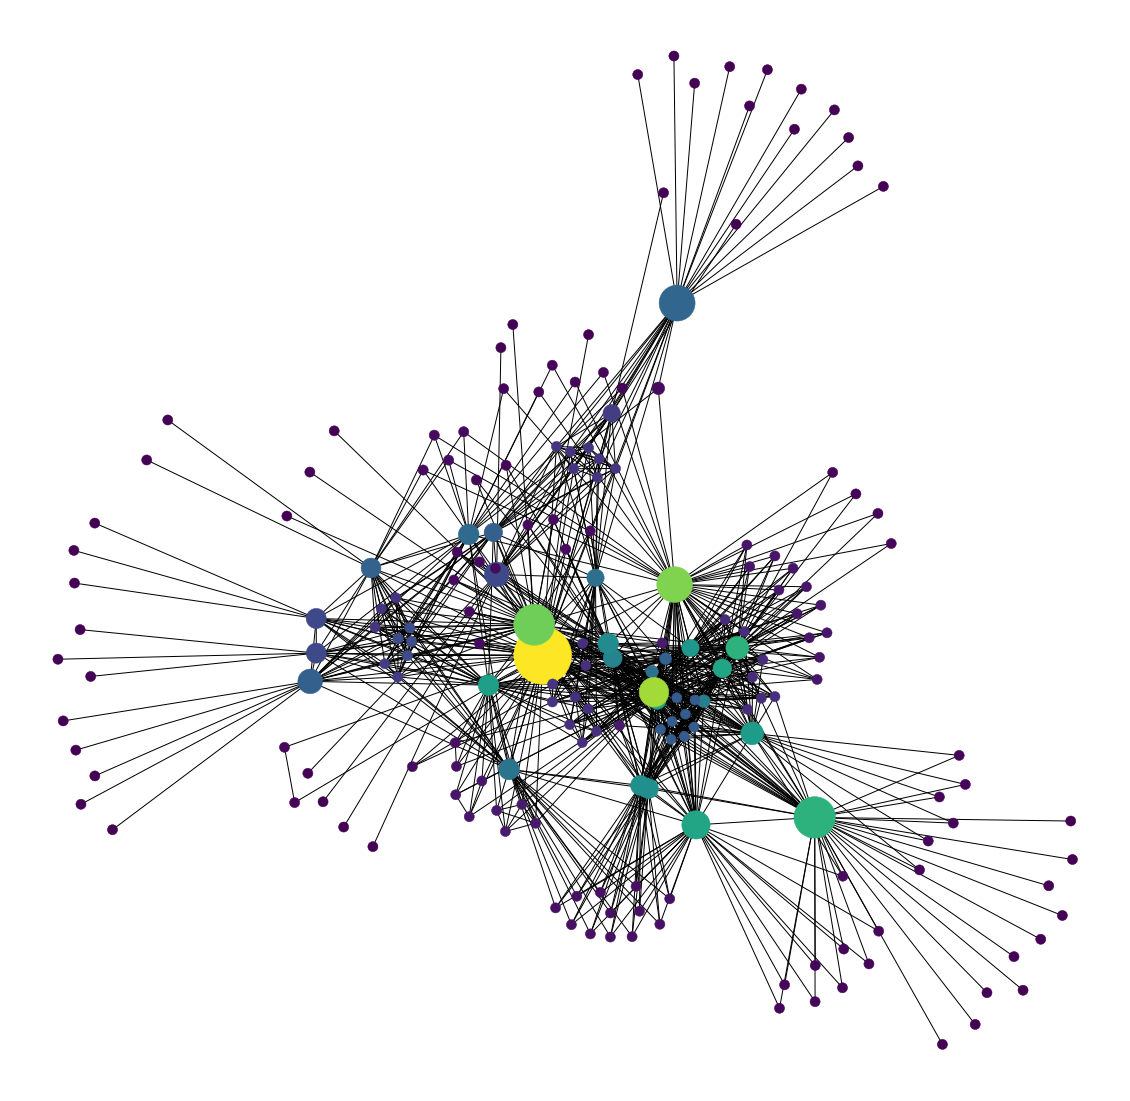

In [101]:
pos = nx.spring_layout(erdo)
betCent = nx.betweenness_centrality(erdo, normalized=True, endpoints=True)
node_color = [20.0 * erdo.degree(v) for v in erdo]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(erdo, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.savefig('erdo_graph.pdf')
plt.show()

8. Plot the clustering coefficient distribution of the above graph and discuss whether a special
polynomial fitting can be achieved.

In [104]:
print(len(nx.clustering(erdo)))

197


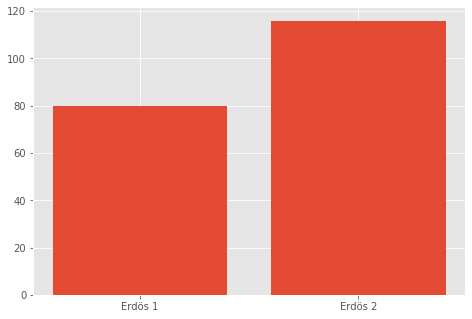

In [107]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

langs = ["Erdös 1", "Erdös 2"]
students = [80, 116]
ax.bar(langs,students)
plt.show()

In [72]:
cluster = (nx.clustering(erdo))

{'7003501910': 0.21103295075897816, '6602400103': 0.4485049833887043, '6701681600': 1.0, '56027056400': 1.0, '56305815400': 0.6047430830039525, '6602280820': 1.0, '56421346300': 1.0, '57189020337': 0.8636363636363636, '25621183300': 1.0, '56089225700': 1.0, '55741327300': 0.46524064171123, '16319687000': 0.6691176470588235, '35876735300': 0.7252747252747253, '39461833000': 0.5098814229249012, '12753130300': 0.5105820105820106, '12238851300': 0.8636363636363636, '6507549454': 1.0, '56819891300': 1.0, '57204120836': 0.8431372549019608, '55557829500': 1.0, '56487114100': 1.0, '56059326700': 0.46153846153846156, '35745670500': 0.3879492600422833, '56725416400': 1.0, '7202820832': 0.8431372549019608, '6602435618': 0.4219219219219219, '56166233900': 1.0, '6701896825': 1.0, '56677447500': 0.6431451612903226, '57193083485': 1.0, '54683567900': 0.2961672473867596, '7101669420': 1.0, '57212994143': 1.0, '23466205000': 0.48188405797101447, '55313517300': 1.0, '35732066600': 0.21694915254237288, '

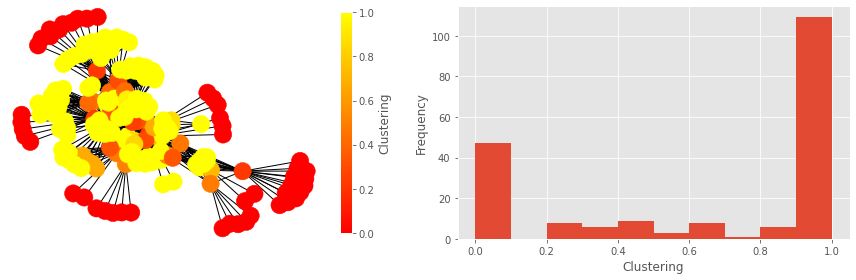

In [98]:
from matplotlib.cm import ScalarMappable


gc = erdo.subgraph(max(nx.connected_components(erdo)))
lcc = nx.clustering(gc)

cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(gc, node_color=node_colors, with_labels=False, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()